<a href="https://colab.research.google.com/github/phrodrigue/URI-problems/blob/master/analise-exploratoria-pandas/Analise_Exploratoria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
#Upload do arquivo
from google.colab import files
arq = files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [ ]:
#Criando nosso DataFrame
df = pd.read_excel("AdventureWorks.xlsx")

In [ ]:
#Visualizando as 5 primeiras linhas
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [ ]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [ ]:
#Verificando os tipos de dados
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [8]:

# Formata os valores decimais
pd.options.display.float_format = '{:20,.2f}'.format

In [14]:
#Qual a Receita total?
round(df["Valor Venda"].sum(), 2)

5984606.14

In [20]:
# Qual o custo Total?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"]) #Criando a coluna de custo

In [21]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,custo,lucro,Custo
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52","2,091.48"


In [22]:
#Qual o custo Total?
round(df["Custo"].sum(), 2)

2486783.05

In [28]:
#Agora que temos a receita e custo e o total, podemos achar o Lucro total
#Vamos criar uma coluna de Lucro que será Receita - Custo
df["Lucro"]  = df["Valor Venda"] - df["Custo"]

In [29]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52"


In [30]:
#Total Lucro
df["Lucro"].sum()

3497823.0926

In [34]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo Envio"] = df["Data Envio"] - df["Data Venda"]

In [35]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20 days


**Agora, queremos saber a média do tempo de envio para cada Marca, e para isso precisamos transformar a coluna 'Tempo Envio' em númerica**

In [36]:
#Extraindo apenas os dias
df["Tempo Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [37]:
df.head(1)

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [39]:
#Verificando o tipo da coluna Tempo_envio
df["Tempo Envio"].dtype

dtype('int64')

In [40]:
#Média do tempo de envio por Marca
df.groupby("Marca")["Tempo Envio"].mean()

Marca
Adventure Works                   8.66
Contoso                           8.47
Fabrikam                          8.51
Name: Tempo Envio, dtype: float64

 **Missing Values**

In [41]:
#Verificando se temos dados faltantes
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo Envio       0
dtype: int64

**E, se a gente quiser saber o Lucro por Ano e Por Marca?**

In [42]:
#Vamos Agrupar por ano e marca
df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum()

Data Venda  Marca          
2008        Adventure Works             306,641.16
            Contoso                      56,416.00
            Fabrikam                  1,557,020.55
2009        Adventure Works             405,395.08
            Contoso                     138,258.95
            Fabrikam                  1,034,091.35
Name: Lucro, dtype: float64

In [43]:
#Qual o total de produtos vendidos?
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

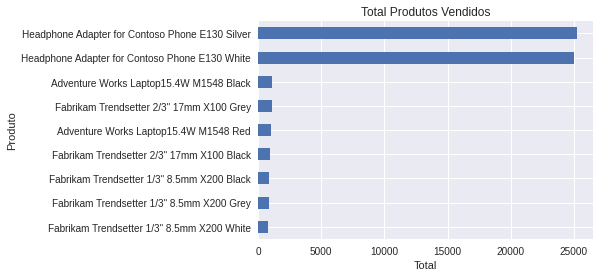

In [44]:
#Gráfico Total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending=True).plot.barh(title="Total Produtos Vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

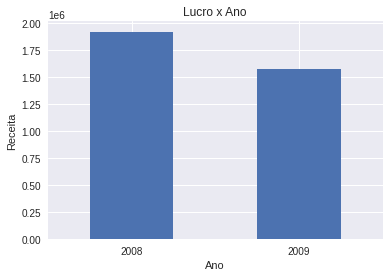

In [47]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title="Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita")
plt.xticks(rotation='horizontal');

In [48]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [49]:
#Selecionando apenas as vendas de 2009
df_2009 = df[df["Data Venda"].dt.year == 2009]

In [50]:
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


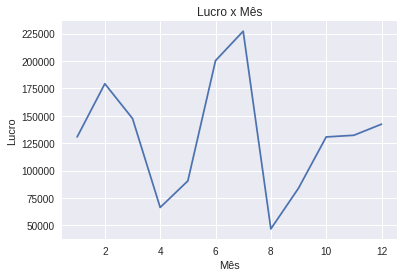

In [53]:

#Lucro por mês no ano de 2009
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

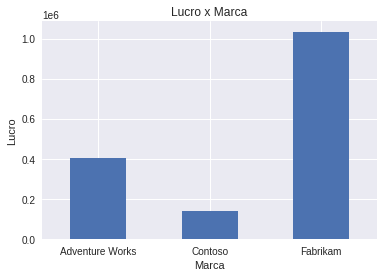

In [55]:
#Lucro por marca no ano de 2009
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title="Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

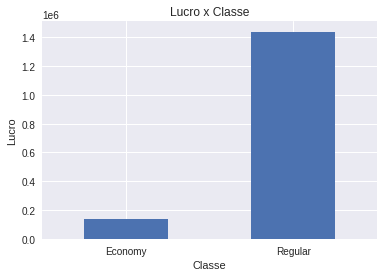

In [58]:
#Lucro por classe no ano de 2009
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title="Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');

In [59]:
df["Tempo Envio"].describe()

count                 904.00
mean                    8.54
std                     3.06
min                     4.00
25%                     6.00
50%                     9.00
75%                    11.00
max                    20.00
Name: Tempo Envio, dtype: float64

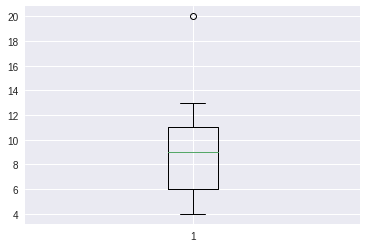

In [60]:
#Gráfico de Boxplot
plt.boxplot(df["Tempo Envio"]);

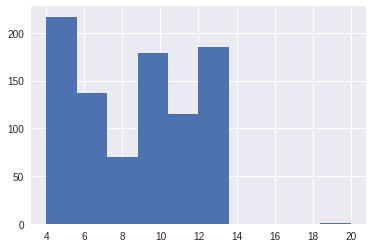

In [61]:
#Histograma
plt.hist(df["Tempo Envio"]);

In [62]:
#Identificando o Outlier
df[df["Tempo Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [63]:
df

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",5
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",6
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
899,2008-03-22,2008-04-04,306,1226,19049,200803224CS555,330.99,999.00,6,419.58,"5,574.42",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","3,588.48",13
900,2008-10-04,2008-10-15,306,1155,19057,200810044CS636,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",11
901,2008-12-11,2008-12-15,306,1155,19060,200812114CS676,324.69,980.00,6,"1,176.00","4,704.00",Fabrikam Trendsetter 2/3'' 17mm X100 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,948.14","2,755.86",4
902,2008-12-17,2008-12-21,306,1226,19060,200812174CS676,330.99,999.00,6,"1,198.80","4,795.20",Fabrikam Trendsetter 1/3'' 8.5mm X200 Black,"Fabrikam, Inc.",Fabrikam,Regular,Black,"1,985.94","2,809.26",4


**Lucro por loja**

In [79]:
#Quantidade de lojas
df["ID Loja"].nunique()

3

In [71]:
df.groupby("ID Loja")["Lucro"].sum()

ID Loja
199           1,294,718.51
306           1,016,493.12
307           1,186,611.46
Name: Lucro, dtype: float64

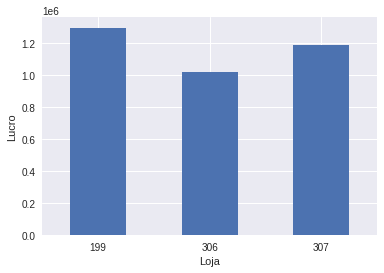

In [76]:
#Loja mais lucrativa
df.groupby("ID Loja")["Lucro"].sum().plot.bar()
plt.xlabel("Loja")
plt.ylabel("Lucro")
plt.xticks(rotation='horizontal');